In [2]:
import torch
from torch.utils.data import DataLoader
from engine.datasets import GraphDataset
from engine.Tmodel import GraphTransformerV2
from engine.train import train_model
from engine.predict import predict
from engine.cr_boosters.adam import Adam
import engine.core_rec as cr
import numpy as np
import networkx as nx
from torch_geometric.datasets import Planetoid
import engine.vish_graphs as vg

In [3]:
# Step 1: Load and preprocess the Cora dataset
dataset = Planetoid(root='/tmp/Cora', name='Cora')
data = dataset[0]
adj_matrix = nx.to_numpy_array(nx.from_edgelist(data.edge_index.t().tolist()))
weight_matrix = np.ones_like(adj_matrix)  # Example weight matrix with all ones

graph_dataset = GraphDataset(adj_matrix, weight_matrix)
data_loader = DataLoader(graph_dataset, batch_size=32, shuffle=True)


In [4]:
# Step 2: Initialize the model
model = GraphTransformerV2(num_layers=2, d_model=128, num_heads=4, d_feedforward=512, input_dim=adj_matrix.shape[1])

In [5]:
# optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
optimizer = Adam(model.parameters(), lr=0.0001)

In [6]:
# Step 3: Train the model
criterion = torch.nn.MSELoss()
train_model(model, data_loader, criterion, optimizer, num_epochs=10)


Epoch 1/10, Loss: 0.23899459838867188
Epoch 2/10, Loss: 0.12104451656341553
Epoch 3/10, Loss: 0.11378292739391327
Epoch 4/10, Loss: 0.11275476217269897
Epoch 5/10, Loss: 0.11336733400821686
Epoch 6/10, Loss: 0.10958745330572128
Epoch 7/10, Loss: 0.10929831117391586
Epoch 8/10, Loss: 0.11113206297159195
Epoch 9/10, Loss: 0.10879536718130112
Epoch 10/10, Loss: 0.10706265270709991


In [7]:
# Step 4: Make predictions
node_index = 1147
recommended_nodes = cr.predict(model, adj_matrix, node_index, top_k=5, threshold=0.5)
print(f"Recommended nodes for node {node_index}: {recommended_nodes}")

Recommended nodes for node 1147: [2181, 2118, 723, 1647, 2150]


NameError: name 'test_loader' is not defined

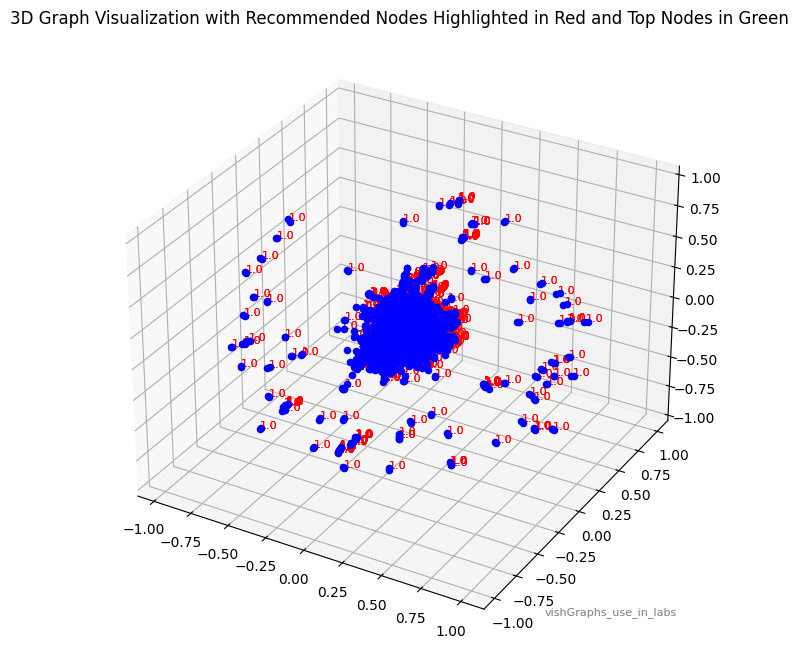

In [23]:
# Step 6: Draw the graph
vg.draw_graph_3d(adj_matrix, recommended_nodes=recommended_nodes,transparent_labeled=False,edge_weights=weight_matrix)